## 4 Jednoduché programy s jedním cyklem a několika proměnnými

V této třídě programů lze vyzkoušet spoustu dílčích problémů souvisejících s programováním jaké fyzik potká. 

Nejprve vyzkoušíme, co to znamená, když se během každého opakování cyklu mění více proměnných. 
Hodnoty proměnných si můžeme představit jako stav v němž se výpočet nachází a takovýto cyklus tedy bude popisovat vývoj komplikovanějšího stavu.

### 4.1 Největší společný dělitel

Vrátíme se k *efektivní* implementaci Euklidova algoritmu pro hledání největšího společného (NSD) dělitele dvou celých čísel. Klíčovou operací zde je bytek po dělení, `x` **mod** `y` v Pacalu, 
a nebo často `x % y`. Fakt, že 2*4+3=11 znamená, že

11 mod 4 --->  3

In [0]:
# Nejprve pomalý Euklidův algoritmus pro opakování
a = 701316
b = 52026

print( "GCD(",a,",",b,") = ", end="")

while a!=b:
    if a>b:
        a = a-b
        print("a ", end="")
    else:
        b = b-a
        print("b ", end="")

print(a)        

GCD( 701316 , 52026 ) = a a a a a a a a a a a a a b b a a a a a a a a a a a a b b b b b b b b b b b b b b 138


Tento algoritmus neustále upravuje obsah proměnných *a* a *b* tak aby zůstal NSD nezměněný. 
(Písmena a a b ukazují, kolikrát se která větev cyklu provedla.) Zde pomůže operace **mod**, která nahradí opakované odčítání stejné hodnoty. 

Zatímco výse se měnila vždy jen jedna z a,b nyní se budou také prohazovat:

In [0]:
# Euklidův algoritmus s DIV
a = 701316
b = 52026

print( "GCD(",a,",",b,") = ", end="")

while b>0:  
    c = a % b
    a = b
    b = c
    print(". ", end="")

print(a)        

GCD( 701316 , 52026 ) = . . . . 138


Zde jsme potřebovali proměnnou `c` jen na uložení mezivýsledku, vlastně jsme chtěli provést
$$
\left(\begin{array}{c} a \\ b\end{array}\right) := 
\left(\begin{array}{c} b \\ a ~\mathbf{mod}~ b\end{array}\right)
$$
na což obvykle (C,Pascal) potřebujeme pomocnou proměnnou. Hle však:

In [0]:
# Euklidův algoritmus s DIV a TUPPLES
a = 701316
b = 52026

print( "GCD(",a,",",b,") = ", end="")

while b>0:  
    (a, b) = ( b, a % b )
    print(". ", end="")

print(a)        

GCD( 701316 , 52026 ) = . . . . 138


### 4.1 Hledání kořene půlením intervalu

Nyní již máme zkušenosti s cykly a reálnými čísly, takže s můžeme podívat na důležitý a užitečný algoritmus bisekce.

Problém -- řešte rovnici
$$
\cos(t) = 100-4t
$$

(Vzhledem k oboru hodnot kosinu bude kořen někde v intervalu $t\in(99/4,101/4)$.)

In [0]:
import math

def f(t):
    return math.cos(t)-(100-4*t)

a = 99/4.0    # V Python 3 stačí 99/4, ale zvykáme si kvůli C atp.
b = 101/4.0
eps = 1E-13

fa = f(a)
fb = f(b)

assert fa*fb < 0, "Kořen není uvnitř daného intervalu"

while b-a>eps:
    c = (a+b)/2  # půlení
    fc = f(c)
    if fc == 0:
        break

    if fa * fc > 0:
        a = c
    else:
        b = c

print( c, f(c) )       

24.76657343014375 -7.704947790898586e-14


Ještě se podíváme, jak výpočet postupuje, musíme použít speciální logaritmické měřítko, abychom do jednoho obrázku dostali jak původní interval délky 1/2 tak ten konečný

24.766573430143772 1.5765166949677223e-14


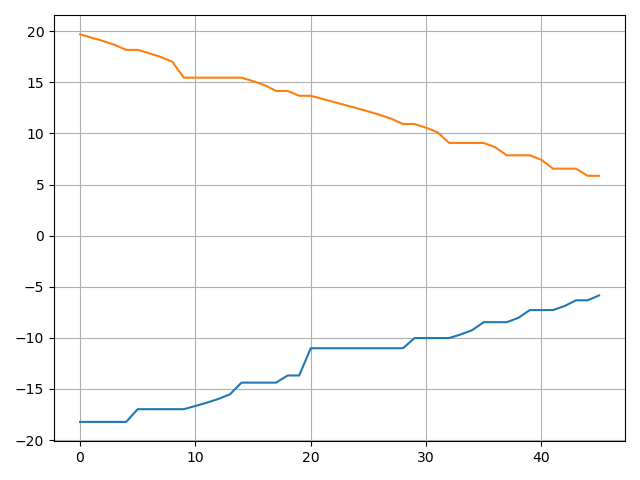

In [0]:
import math

def f(t):
    return math.cos(t)-(100-4*t)

a = 99/4.0    # V Python 3 stačí 99/4, ale zvykáme si kvůli C atp.
b = 101/4.0
eps = 1E-14

A=[]
B=[]

fa = f(a)
fb = f(b)

assert fa*fb < 0, "Kořen není uvnitř daného intervalu"

while b-a>eps:
    A.append(a)
    B.append(b)

    c = (a+b)/2  # půlení
    fc = f(c)
    if fc == 0:
        break

    if fa * fc > 0:
        a = c
    else:
        b = c

print( c, f(c) )      

import matplotlib.pyplot as plt

A = [math.asinh((a-c)*5E19)/math.log(10) for a in A]
B = [math.asinh((b-c)*5E19)/math.log(10) for b in B]
N = range(0,len(A))
plt.plot(N,A)
plt.plot(N,B)
plt.grid()
plt.show()